In [1]:
#importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df_train=pd.read_csv("House_train.csv")
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
#checking the shape 
df_train.shape

(1168, 81)

As we can see that we have 1168 rows and 81 columns

In [4]:
#lets check the dtypes
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
#checking the whole information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Here we can see that we have
float =3
inte = 35
object = 43

# Checking the Null values 

In [6]:
df_train.isnull().values.any()

True

In [7]:
#There is Null values present in the data
#checking it via calculating it

In [8]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Here we can't see that how many columns have null values lets check that via heatmap

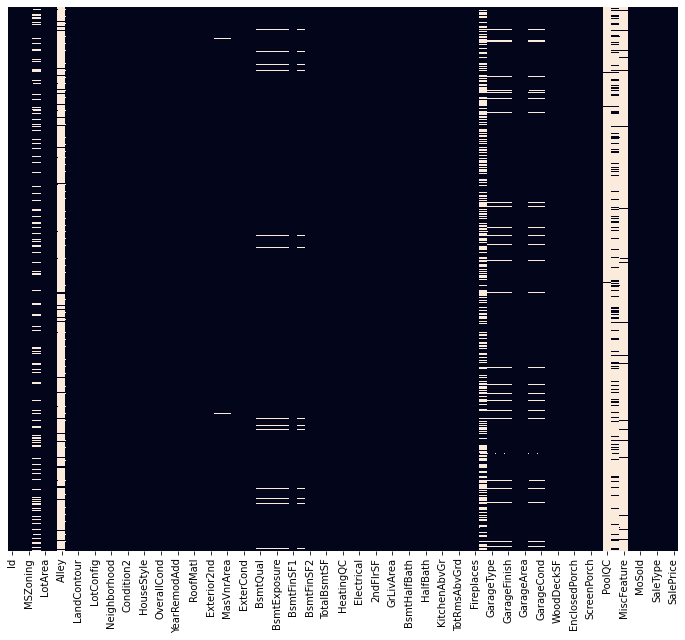

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)
plt.show()

Now we can clearly identify that there is lots of Null values present in the Dataset

In [10]:
#Treating Null values

In [11]:
def Handling_Nan(df):
    N=df_train.columns
    for i in N:
        if df[i].dtype!='object':
            df[i].fillna(df[i].mean(),inplace=True)
        else:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [12]:
#calling the Function
Handling_Nan(df_train)

In [13]:
#checking the Null values Again
df_train.isnull().values.any()

False

Now we have cleared all the Null values

# Checking the Correlation

In [14]:
dfcor=df_train.corr()
dfcor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.005969 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.336681 -0.124151     0.070462   
LotFrontage   -0.005969   -0.336681     1.000000  0.299452     0.229218   
LotArea       -0.029212   -0.124151     0.299452  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.229218  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.047573  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.112655  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.088799  0.027228     0.555945   
MasVnrArea    -0.060503    0.027813     0.188758  0.121086     0.407230   
BsmtFinSF1     0.003868   -0.052236     0.228996  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.002159  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.113924  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.356107  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.403436  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.089675  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.007506 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.374251  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.094046  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001389  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.171773  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.047816  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.237199  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002729 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.318771  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.230610  0.285983     0.390067   
GarageYrBlt   -0.000456    0.073130     0.055992 -0.034765     0.511482   
GarageCars     0.007549   -0.027639     0.260252  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.322644  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.088334  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.151328  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.020902 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.051084  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.030405  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.196001  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.001329  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.022517  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.003885 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.323779  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.060503    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.027813   -0.052236   
LotFrontage      -0.047573   0.112655      0.088799    0.188758    0.228996   
LotArea           0.017513   0.005506      0.027228    0.121086    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.407230    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.137475   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.321905    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.181385    0.114430   
MasVnrArea       -0.137475   0.321905      0.181385    1.000000    0.265735   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.265735    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.065707   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.109562   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.365016    0

here we can check the correlation

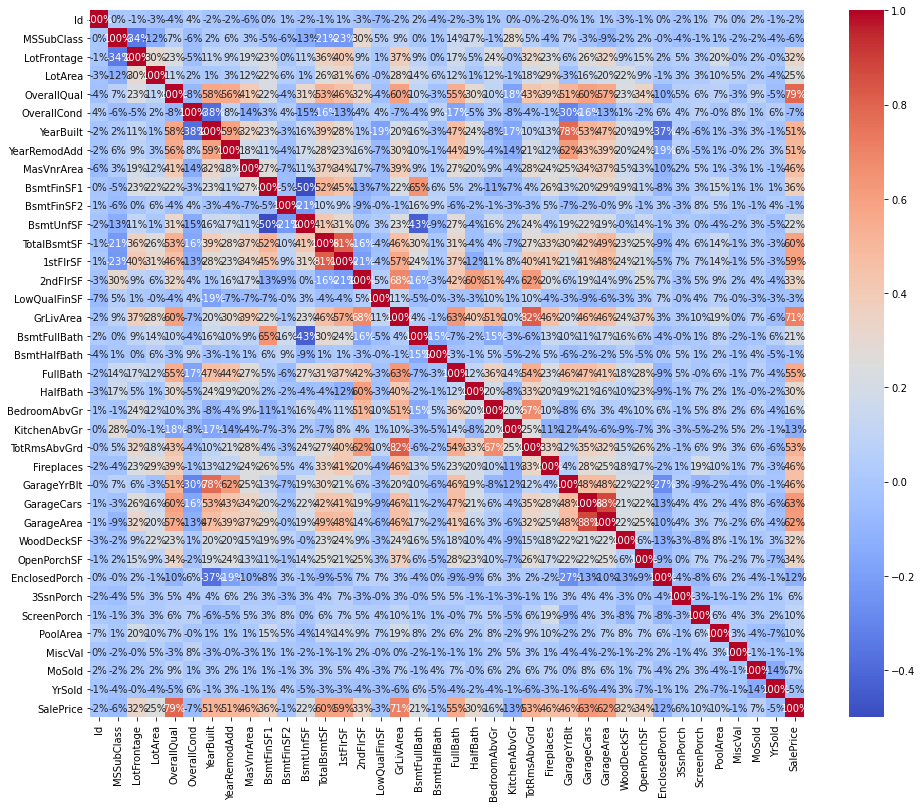

In [15]:
#Lets plot the correlation with heatmap
plt.figure(figsize=(16,13))
sns.heatmap(dfcor,annot=True,cmap="coolwarm",fmt='.0%')
plt.show()

In [16]:
#checking the correlation with Target variable

Text(0.5, 1.0, 'Correlation with target variable')

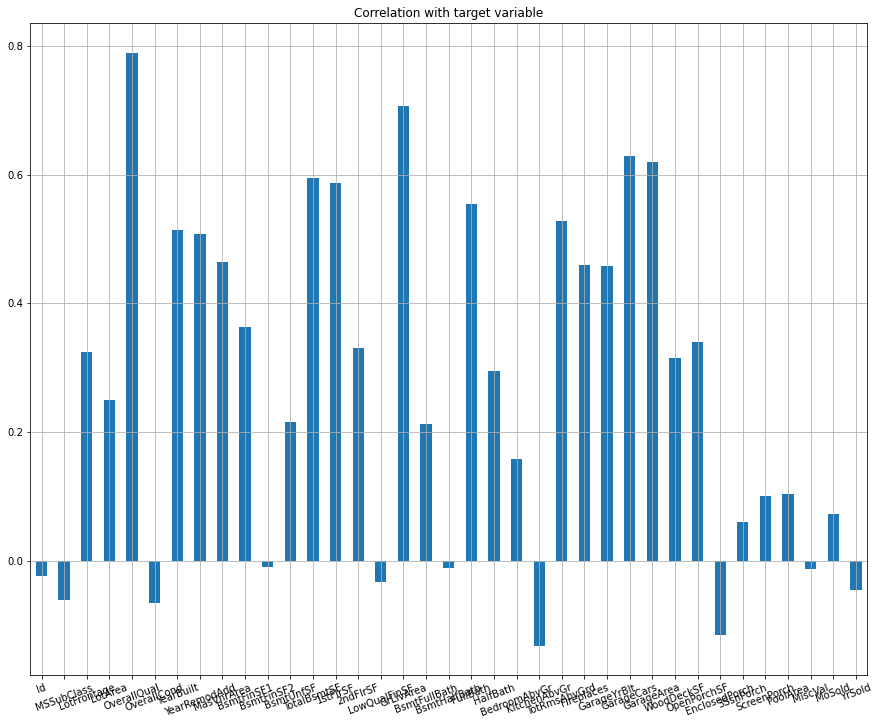

In [17]:
plt.figure(figsize=(15,12))
df_train.drop('SalePrice',axis=1).corrwith(df_train['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable")

here we can see that which all the columns are negatively correlated with target variable

# Exploring Categorical columns

In [18]:
for column in df_train.columns:
    if df_train[column].dtype==object:
        print(str(column)+ ':' + str(df_train[column].unique()))
        print("************************************************")
        print("\n")

MSZoning:['RL' 'RM' 'FV' 'RH' 'C (all)']
************************************************


Street:['Pave' 'Grvl']
************************************************


Alley:['Grvl' 'Pave']
************************************************


LotShape:['IR1' 'Reg' 'IR2' 'IR3']
************************************************


LandContour:['Lvl' 'Bnk' 'HLS' 'Low']
************************************************


Utilities:['AllPub']
************************************************


LotConfig:['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
************************************************


LandSlope:['Gtl' 'Mod' 'Sev']
************************************************


Neighborhood:['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
************************************************


Condition1:['Norm' '

In [19]:
#lets check the Summery of Statastics

In [20]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.988470   10484.749144     6.104452   
std     416.159877    41.940650    22.437056    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.988470    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.047152   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# Univeriate Analysis

In [21]:
#lets check the column names
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

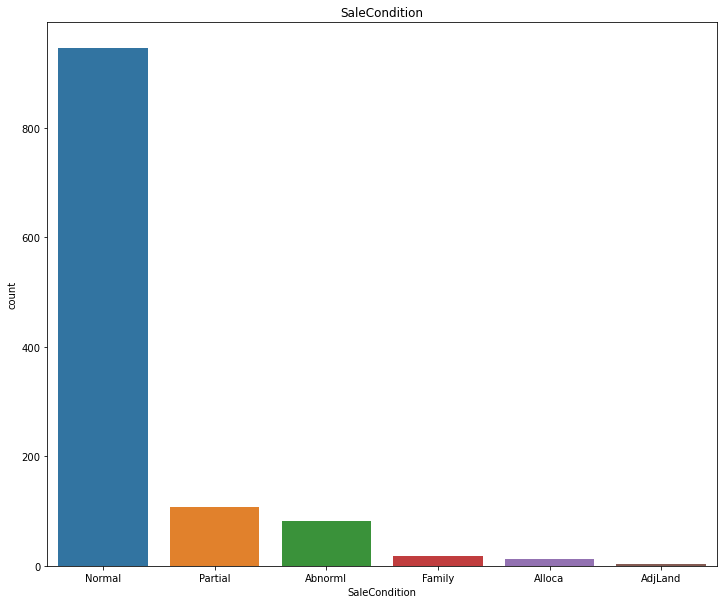

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


In [22]:
#SaleCondition

plt.figure(figsize=(12,10))
sns.countplot(x="SaleCondition",data=df_train)
plt.title("SaleCondition")
plt.show()

print(df_train.SaleCondition.value_counts())

here we can check that normal sale is high as companre to rest

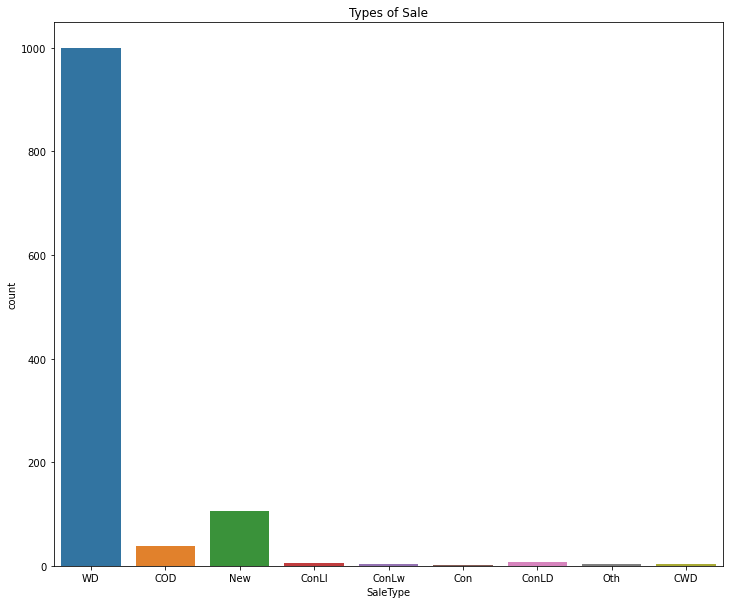

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64


In [23]:
#SaleType

plt.figure(figsize=(12,10))
sns.countplot(x='SaleType',data=df_train)
plt.title("Types of Sale")
plt.show()

print(df_train.SaleType.value_counts())

Warranty Deed - Conventional sales is higher than rest 

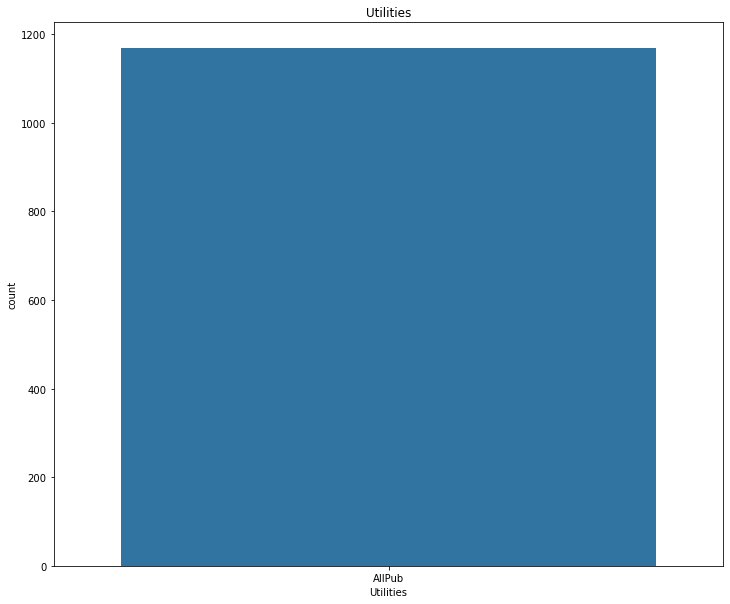

AllPub    1168
Name: Utilities, dtype: int64


In [24]:
#Utilities

plt.figure(figsize=(12,10))
sns.countplot(x='Utilities',data=df_train)
plt.title("Utilities")
plt.show()

print(df_train.Utilities.value_counts())

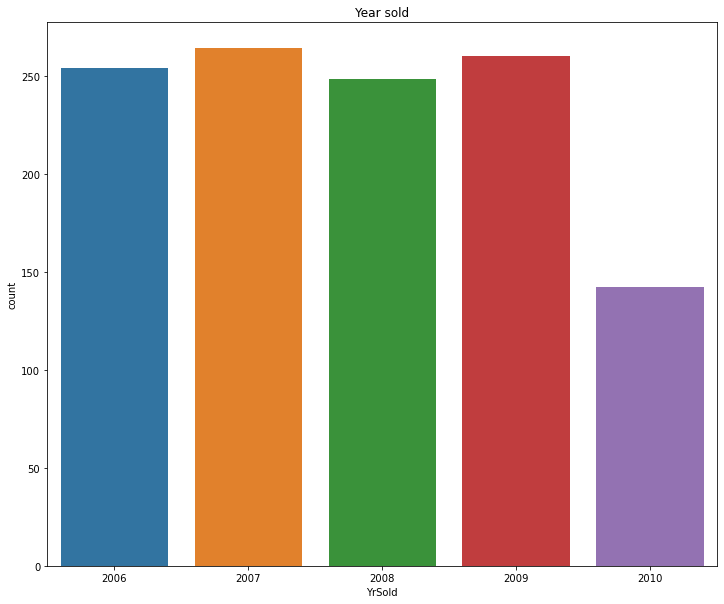

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64


In [25]:
#YrSold

plt.figure(figsize=(12,10))
sns.countplot(x='YrSold',data=df_train)
plt.title("Year sold")
plt.show()

print(df_train.YrSold.value_counts())

In 2007 we got more sale as compare to other years

# Bivariate Analysis

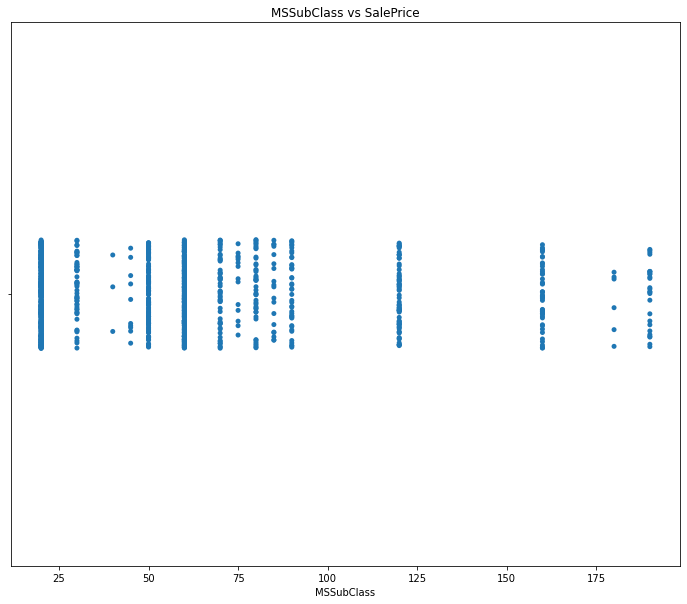

MSSubClass  SalePrice
20          139000       7
            135000       6
            140000       6
            155000       6
            129000       5
                        ..
190         157000       1
            163000       1
            168000       1
            200000       1
            228950       1
Name: SalePrice, Length: 929, dtype: int64


In [26]:
#MSSubClass vs SalePrice

plt.figure(figsize=(12,10))
sns.stripplot(x="MSSubClass",hue="SalePrice",data=df_train)
plt.title("MSSubClass vs SalePrice")
plt.show()

print(df_train.groupby('MSSubClass')['SalePrice'].value_counts())

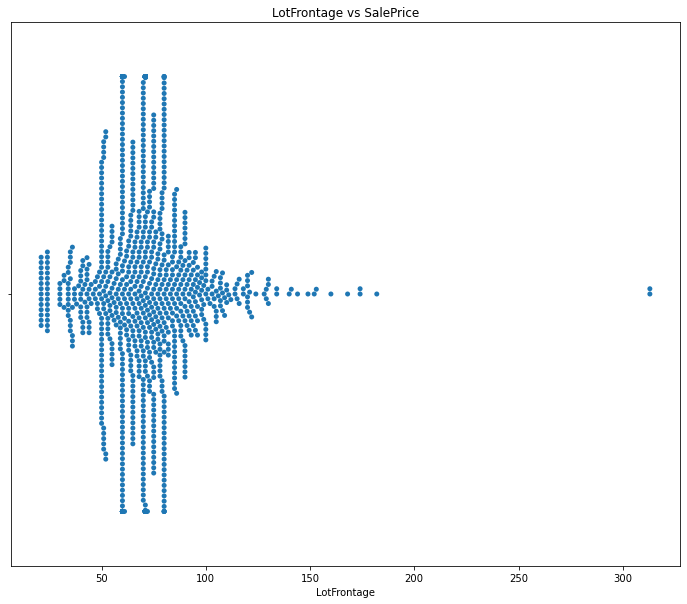

LotFrontage  SalePrice
21.0         75000        1
             75500        1
             80000        1
             81000        1
             85400        1
                         ..
174.0        235000       1
             403000       1
182.0        259000       1
313.0        160000       1
             242000       1
Name: SalePrice, Length: 1061, dtype: int64


In [27]:
# LotFrontage vs SalePrice

plt.figure(figsize=(12,10))
sns.swarmplot(x='LotFrontage',hue='SalePrice',data=df_train)
plt.title("LotFrontage vs SalePrice")
plt.show()

print(df_train.groupby('LotFrontage')['SalePrice'].value_counts())

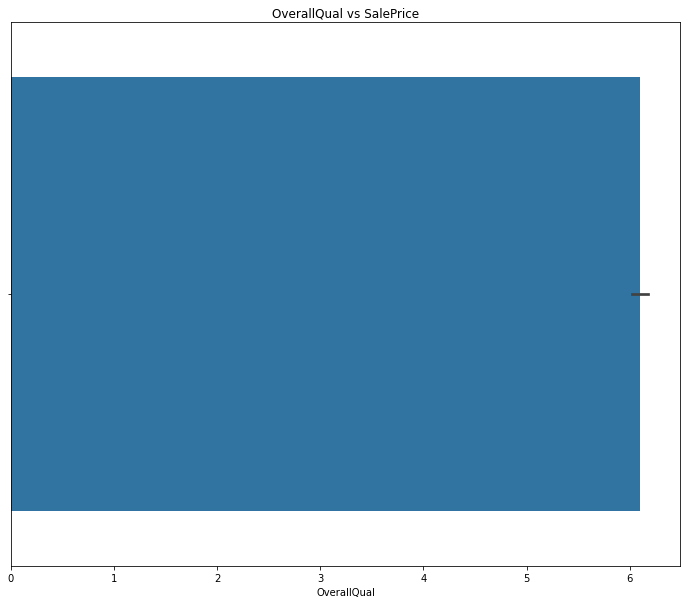

OverallQual  SalePrice
1            39300        1
             61000        1
2            60000        2
             35311        1
3            37900        1
                         ..
10           466500       1
             475000       1
             625000       1
             745000       1
             755000       1
Name: SalePrice, Length: 813, dtype: int64


In [28]:
# OverallQual vs SalePrice

plt.figure(figsize=(12,10))
sns.barplot(x='OverallQual',hue='SalePrice',data=df_train)
plt.title("OverallQual vs SalePrice")
plt.show()

print(df_train.groupby('OverallQual')['SalePrice'].value_counts())

# Multivariate Analysis

<Figure size 864x720 with 0 Axes>

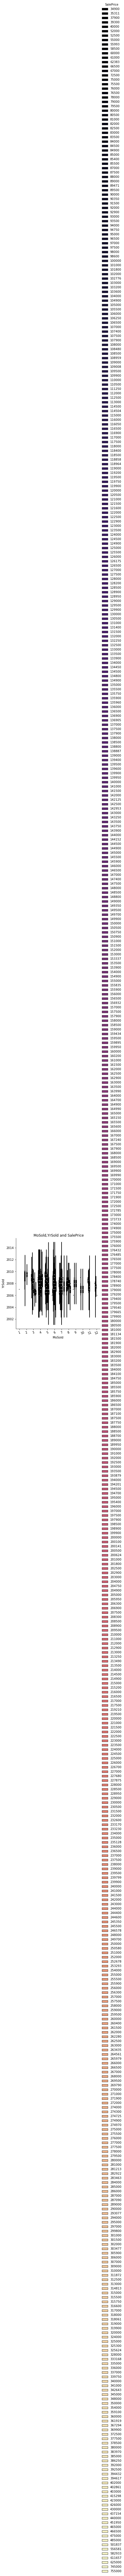

In [29]:
# MoSold,YrSold and SalePrice

plt.figure(figsize=(12,10))
sns.factorplot(x='MoSold',y='YrSold',hue='SalePrice',data=df_train,kind='violin',palette='magma')
plt.title(" MoSold,YrSold and SalePrice")
plt.xticks(rotation=20)
plt.ylabel("YrSold")
plt.show()

# Checking the skewness

In [30]:
df_train.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

In [31]:
#lets plot the skewness

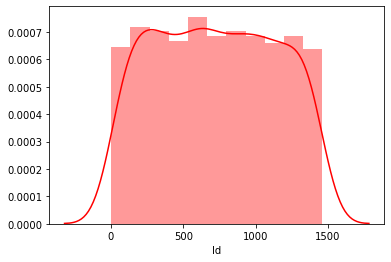

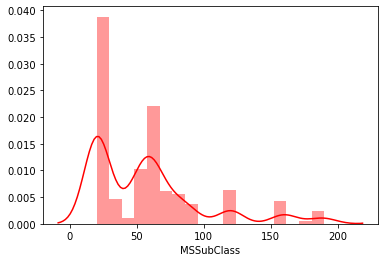

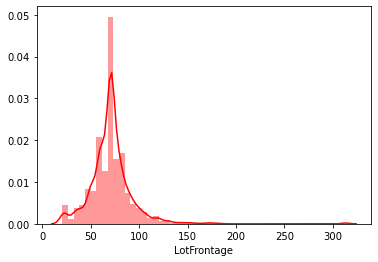

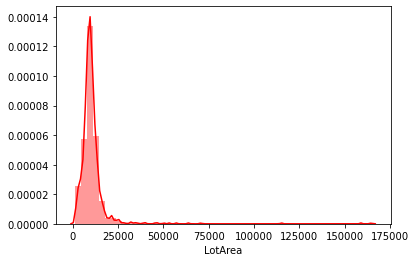

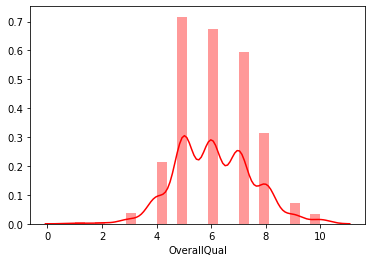

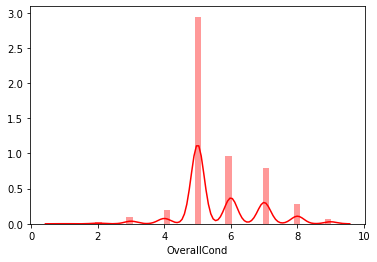

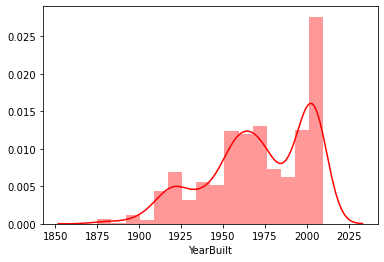

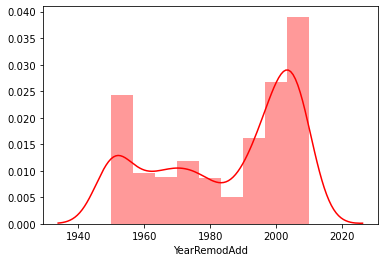

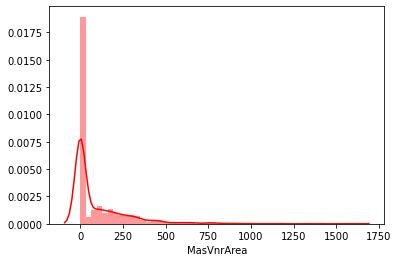

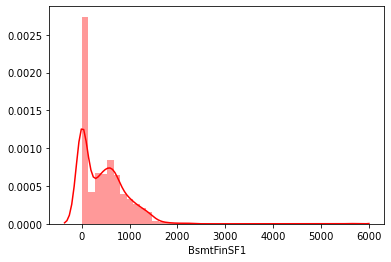

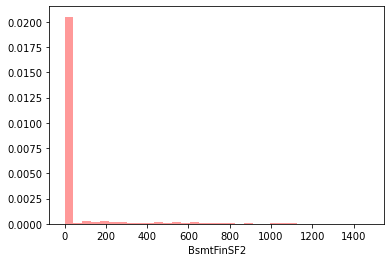

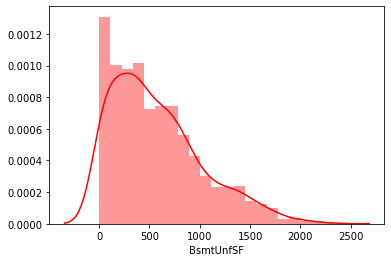

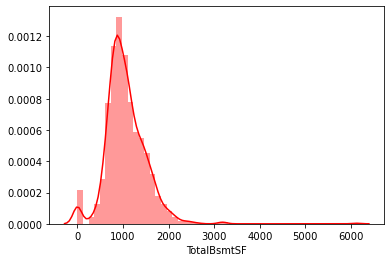

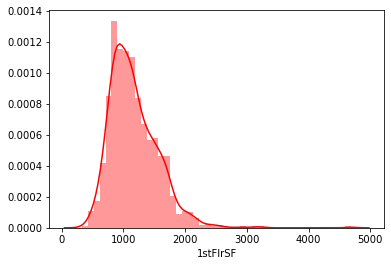

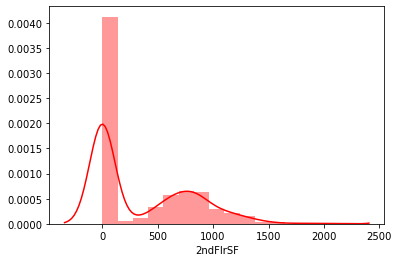

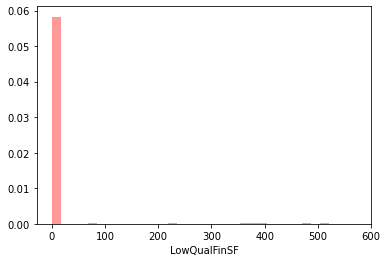

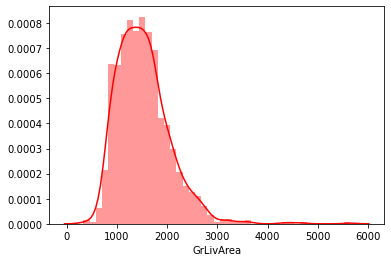

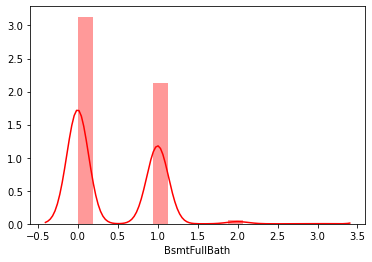

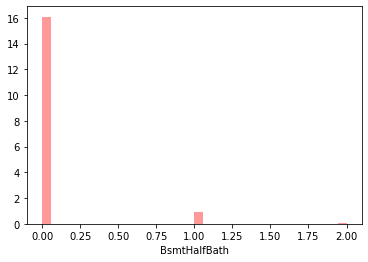

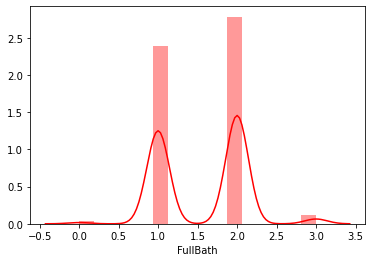

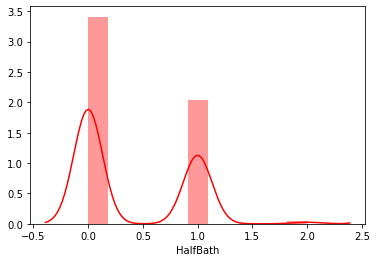

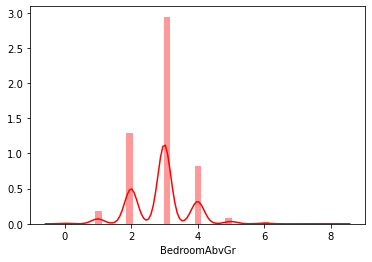

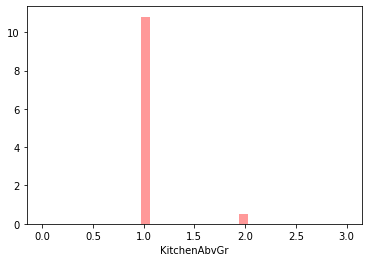

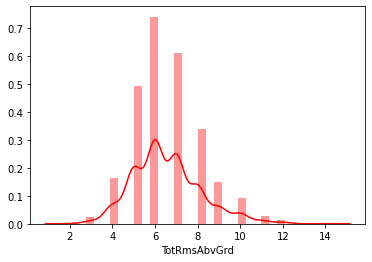

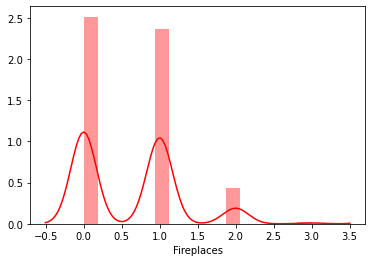

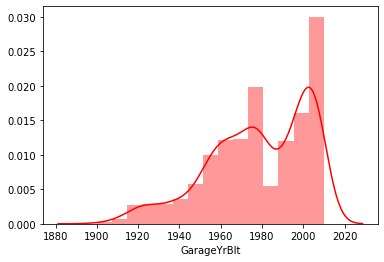

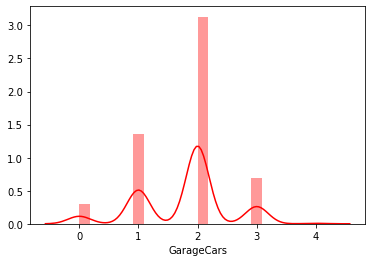

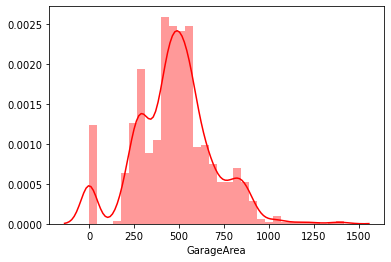

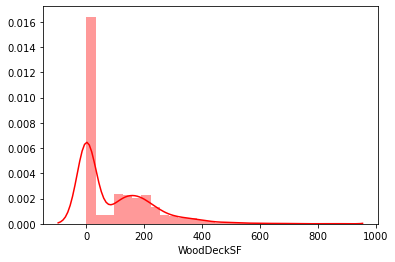

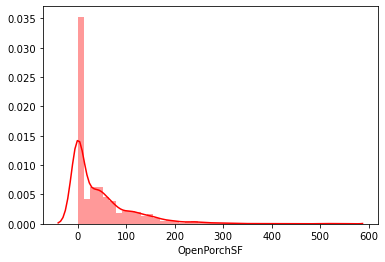

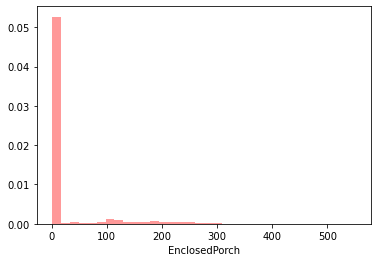

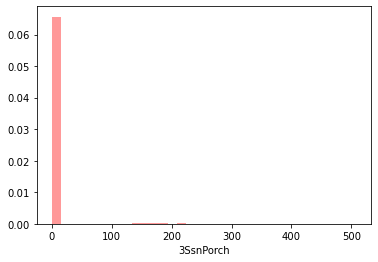

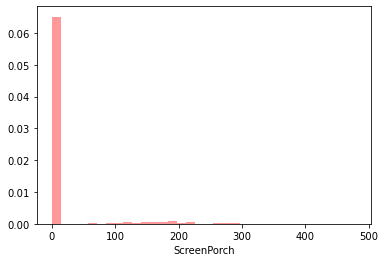

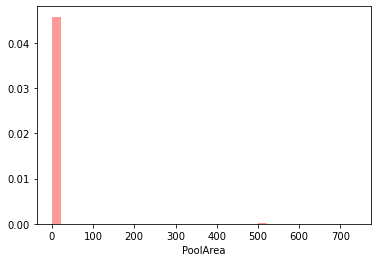

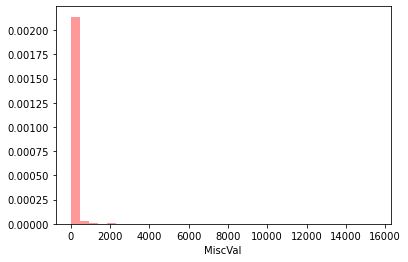

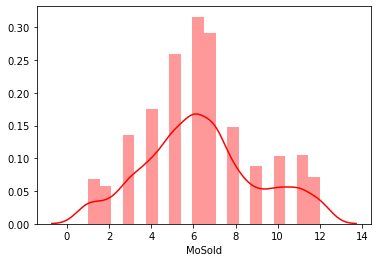

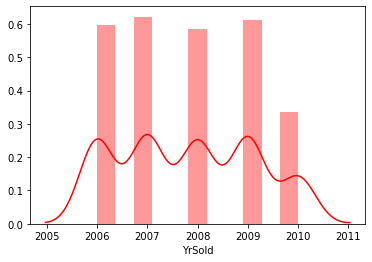

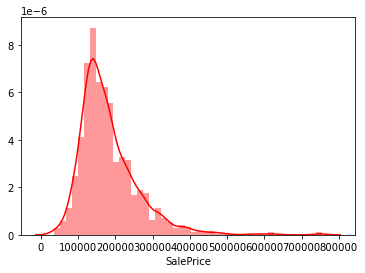

In [32]:
for column in df_train.describe().columns:
    sns.distplot(df_train[column],color='r')
    plt.show()

In this skewved data we can check some data are normaly skewed and some are not

In [33]:
#Treating skewvness via sqaure root and cube root method

In [34]:
for column in df_train.skew().index:
    if column in df_train.describe().columns:
        if df_train[column].skew()>0.55:
            df_train[column]=np.sqrt(df_train[column])
        if df_train[column].skew()<-0.55:
            df_train[column]=np.cbrt(df_train[column]) 

In [35]:
df_train.skew()

Id                0.026526
MSSubClass        0.757142
LotFrontage       0.541796
LotArea           3.659306
OverallQual       0.175082
OverallCond       0.045434
YearBuilt        -0.597188
YearRemodAdd     -0.495864
MasVnrArea        1.075415
BsmtFinSF1       -0.011789
BsmtFinSF2        3.069103
BsmtUnfSF        -0.233752
TotalBsmtSF      -4.895100
1stFlrSF          0.686774
2ndFlrSF          0.425547
LowQualFinSF      7.716517
GrLivArea         0.627312
BsmtFullBath      0.391353
BsmtHalfBath      3.999260
FullBath          0.057809
HalfBath          0.517616
BedroomAbvGr      0.243855
KitchenAbvGr      2.709798
TotRmsAbvGrd      0.232956
Fireplaces        0.047671
GarageYrBlt      -0.678855
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        0.458303
OpenPorchSF       0.606878
EnclosedPorch     2.306067
3SsnPorch         7.673448
ScreenPorch       3.308386
PoolArea         12.917868
MiscVal           9.711267
MoSold            0.220979
YrSold            0.115765
S

In [36]:
#Converting Categorical columns into Numarical
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   float64
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   float64
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [37]:
#importing label encoder for converting the categorical columns to numarical

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()
for column in df_train.columns:
    if df_train[column].dtype==np.number:
        continue
    df_train[column]=le.fit_transform(df_train[column])

In [40]:
df_train.head()

Id  MSSubClass  MSZoning  LotFrontage     LotArea  Street  Alley  \
0   94   10.954451         3     8.425466   70.199715       1      0   
1  720    4.472136         3     9.746794  125.956342       1      0   
2  642    7.745967         3     9.591663   99.599197       1      0   
3   79    4.472136         3    10.246951  108.402030       1      0   
4  341    4.472136         3     8.425466  128.976742       1      0   

   LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0         0            3          0  ...       0.0       2      2   
1         0            3          0  ...       0.0       2      2   
2         0            3          0  ...       0.0       2      2   
3         0            3          0  ...       0.0       2      2   
4         0            3          0  ...       0.0       2      2   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition   SalePrice  
0            2      0.0       1       1         8              4  357.770876  
1            2      0.0       9       1         8              4  517.687164  
2            2      0.0       5       1         8              4  519.413130  
3            2      0.0       0       4         0              4  435.889894  
4            2      0.0       5       3         8              4  463.680925  

[5 rows x 81 columns]

here all categorical columns are converted to numerical data

In [41]:
#Now we will detect the outliers

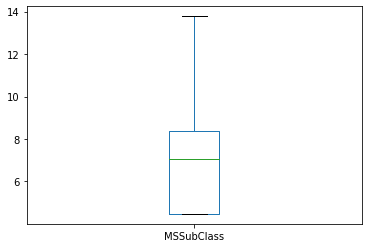

In [42]:
df_train['MSSubClass'].plot.box()

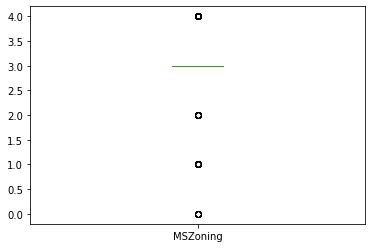

In [43]:
df_train['MSZoning'].plot.box()

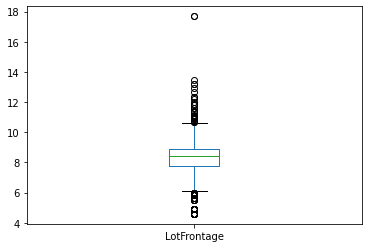

In [44]:
df_train['LotFrontage'].plot.box()

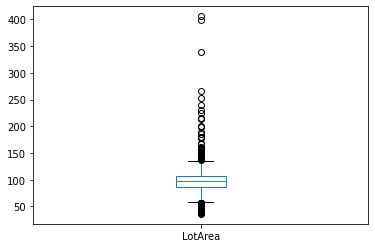

In [45]:
df_train['LotArea'].plot.box()

In [46]:
#Removing Outliers using IQR

In [47]:
def outlier_rem(df_train):
    Q1=df_train.quantile(0.010)
    Q3=df_train.quantile(0.99)
    IQR=Q3-Q1
    df_new=df_train[~((df_train<(Q1-1.5*IQR))|(df_train>(Q3+1.5*IQR))).any(axis=1)]
    print(df_train.shape,df_new.shape)

In [48]:
outlier_rem(df_train)

(1168, 81) (1135, 81)


In [49]:
#Separating input and output variable

In [50]:
x=df_train.drop(columns=['SalePrice'])
x.head()

Id  MSSubClass  MSZoning  LotFrontage     LotArea  Street  Alley  \
0   94   10.954451         3     8.425466   70.199715       1      0   
1  720    4.472136         3     9.746794  125.956342       1      0   
2  642    7.745967         3     9.591663   99.599197       1      0   
3   79    4.472136         3    10.246951  108.402030       1      0   
4  341    4.472136         3     8.425466  128.976742       1      0   

   LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  \
0         0            3          0  ...      0.00000       0.0       2   
1         0            3          0  ...     14.96663       0.0       2   
2         0            3          0  ...      0.00000       0.0       2   
3         0            3          0  ...      0.00000       0.0       2   
4         0            3          0  ...      0.00000       0.0       2   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0      2            2      0.0       1       1         8              4  
1      2            2      0.0       9       1         8              4  
2      2            2      0.0       5       1         8              4  
3      2            2      0.0       0       4         0              4  
4      2            2      0.0       5       3         8              4  

[5 rows x 80 columns]

In [51]:
y=df_train.SalePrice
y.head()

0    357.770876
1    517.687164
2    519.413130
3    435.889894
4    463.680925
Name: SalePrice, dtype: float64

# Model Training

In [52]:
#importing Required Algoritham for model training

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [54]:
def maxr2_score(reg,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
            

In [55]:
#lets use Linear Regression  and check max r2 score corresponding to different random state

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lrg=LinearRegression()
r_state=maxr2_score(lrg,x,y)

r2 score corresponding to  42 is 0.8287514244787966
r2 score corresponding to  43 is 0.8651518479789364
r2 score corresponding to  44 is 0.8876377874303598
r2 score corresponding to  45 is 0.7877162525671764
r2 score corresponding to  46 is 0.8589453685397141
r2 score corresponding to  47 is 0.8406526086149697
r2 score corresponding to  48 is 0.8972031377737295
r2 score corresponding to  49 is 0.8901120246102023
r2 score corresponding to  50 is 0.8794104349443352
r2 score corresponding to  51 is 0.8507248360192566
r2 score corresponding to  52 is 0.8547439558077009
r2 score corresponding to  53 is 0.8672286062888984
r2 score corresponding to  54 is 0.8712326546026248
r2 score corresponding to  55 is 0.8544871613270866
r2 score corresponding to  56 is 0.8724763717644498
r2 score corresponding to  57 is 0.8534716939572288
r2 score corresponding to  58 is 0.8607357628542486
r2 score corresponding to  59 is 0.7707181309733206
r2 score corresponding to  60 is 0.8505400214562261
r2 score cor

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [59]:
neighbors={"n_neighbors":range(1,30)}
KNN=KNeighborsRegressor()
gscv=GridSearchCV(KNN,neighbors,cv=10)
gscv.fit(x,y)
gscv.best_params_

{'n_neighbors': 6}

In [60]:
#Lets use KNN regression and check max r2 score corresponding to different random state

In [61]:
KNN=KNeighborsRegressor(n_neighbors=6)
r_state=maxr2_score(KNN,x,y)

r2 score corresponding to  42 is 0.564446594026169
r2 score corresponding to  43 is 0.5082924967892564
r2 score corresponding to  44 is 0.5134200905224922
r2 score corresponding to  45 is 0.4770956278935775
r2 score corresponding to  46 is 0.6111025882129255
r2 score corresponding to  47 is 0.5794936576747882
r2 score corresponding to  48 is 0.49478413608822747
r2 score corresponding to  49 is 0.539716536295886
r2 score corresponding to  50 is 0.5949490991018214
r2 score corresponding to  51 is 0.6141045184064511
r2 score corresponding to  52 is 0.5569374730986647
r2 score corresponding to  53 is 0.5709286478925675
r2 score corresponding to  54 is 0.5422973374305391
r2 score corresponding to  55 is 0.5716802840729757
r2 score corresponding to  56 is 0.5741123877338508
r2 score corresponding to  57 is 0.556430498608988
r2 score corresponding to  58 is 0.4982043187508055
r2 score corresponding to  59 is 0.4737704175709696
r2 score corresponding to  60 is 0.5397403388940787
r2 score corre

In [62]:
#Lets check mean r2 score of both Linear Regression and KNN Regressor

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
#lets check mean r score of Linear Regression

In [65]:
print("Mean r2 score for Linear Regression:",cross_val_score(lrg,x,y,cv=5,scoring="r2").mean())

Mean r2 score for Linear Regression: 0.8215564166741511


In [66]:
#lets check std score of linear Regression

In [67]:
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lrg,x,y,cv=5,scoring="r2").std())

standard deviation in r2 score for Linear Regression: 0.06275512204323938


In [68]:
#lets check Lasso Regression and find the best value of alpha

In [69]:
from sklearn.linear_model import Lasso
ls=Lasso()

In [70]:
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [71]:
#lets check max r2 score when use Lasso

In [72]:
ls=Lasso(alpha=1)
r_state=maxr2_score(ls,x,y)

r2 score corresponding to  42 is 0.8112756193580386
r2 score corresponding to  43 is 0.8581634989285647
r2 score corresponding to  44 is 0.866491989967355
r2 score corresponding to  45 is 0.7871185277338753
r2 score corresponding to  46 is 0.8752732951382117
r2 score corresponding to  47 is 0.8674821190093837
r2 score corresponding to  48 is 0.8945919617589781
r2 score corresponding to  49 is 0.9028476463719998
r2 score corresponding to  50 is 0.8886259244024272
r2 score corresponding to  51 is 0.8827842364077021
r2 score corresponding to  52 is 0.8771056950405876
r2 score corresponding to  53 is 0.8578642355765734
r2 score corresponding to  54 is 0.8695092703546167
r2 score corresponding to  55 is 0.8713861419286557
r2 score corresponding to  56 is 0.8953316312799277
r2 score corresponding to  57 is 0.8220365196106845
r2 score corresponding to  58 is 0.8806066623586688
r2 score corresponding to  59 is 0.7642753224886862
r2 score corresponding to  60 is 0.8789971883225928
r2 score corr

In [73]:
#lets use cross val score with lasso

In [74]:
print("Mean r2 score for lasso regression:",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())

Mean r2 score for lasso regression: 0.8392851879792055


In [75]:
print("Standard deviation in r2 score for LassoRegression:",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Standard deviation in r2 score for LassoRegression: 0.05619015370687266


In [76]:
#Now we will try to use gradient boosting technique and for getting best set of parameter we will use grid search

In [77]:
#importing Gadient Boosting 
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,150,200]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 150}

In [79]:
#Now we will use cross val score to check the mean r2 score and standard deviation

In [80]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=150)

In [81]:
print("Mean r2 score for gradient boosting regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())

Mean r2 score for gradient boosting regression: 0.8813391204065544


In [82]:
print("standard deviation in r2 score for gradient boosting regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

standard deviation in r2 score for gradient boosting regression: 0.031837296303366215


In [83]:
#Now lets use AdaBoost Regressor Algirithm

In [84]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [85]:
Ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,150,200]}
clf=GridSearchCV(Ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 1, 'n_estimators': 150}

In [86]:
Ada_reg=AdaBoostRegressor(learning_rate=0.1,n_estimators=150)

In [87]:
#Checking mean r2 score of AdaBoost Regressor

In [88]:
print("Mean r2 score for AdaBoosting Regressor:",cross_val_score(Ada_reg,x,y,cv=5,scoring="r2").mean())

Mean r2 score for AdaBoosting Regressor: 0.8054084076993778


In [89]:
print("Standard deviation in r2 score for Ada boosting regressor:",cross_val_score(Ada_reg,x,y,cv=5,scoring="r2").std())

Standard deviation in r2 score for Ada boosting regressor: 0.03171605951810419


In [90]:
#lets check the maximam r2_Score corresponding to this ---

In [91]:
r_state=maxr2_score(Ada_reg,x,y)

r2 score corresponding to  42 is 0.7779645197141178
r2 score corresponding to  43 is 0.8237964578423437
r2 score corresponding to  44 is 0.8170407507662053
r2 score corresponding to  45 is 0.8023085690383363
r2 score corresponding to  46 is 0.787899258100406
r2 score corresponding to  47 is 0.7606866902695066
r2 score corresponding to  48 is 0.8189204430424579
r2 score corresponding to  49 is 0.8181788975712417
r2 score corresponding to  50 is 0.8286104051366784
r2 score corresponding to  51 is 0.8184059542178704
r2 score corresponding to  52 is 0.8158228377617877
r2 score corresponding to  53 is 0.8348125066749315
r2 score corresponding to  54 is 0.7890245537261389
r2 score corresponding to  55 is 0.7918795097847491
r2 score corresponding to  56 is 0.8119493219693574
r2 score corresponding to  57 is 0.8246299450748922
r2 score corresponding to  58 is 0.7853557250492701
r2 score corresponding to  59 is 0.8057754847774395
r2 score corresponding to  60 is 0.8360516090909522
r2 score corr

In [92]:
#till Now we have tried all model Lasso has performed better

In [93]:
#Rendom state corresponding to highest r2_score is 89 

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=0.22)

In [95]:
ls=Lasso()
ls.fit(x_train,y_train)
y_pred=ls.predict(x_test)

In [96]:
y_pred

array([370.27410078, 352.24159731, 356.12047791, 482.5626054 ,
       441.39285879, 321.4570059 , 573.46037582, 360.70902687,
       365.76796323, 445.97122519, 285.07399806, 363.5186955 ,
       409.35986763, 496.84551735, 351.13333233, 450.1809353 ,
       367.2123564 , 384.73858075, 366.20873437, 406.18844024,
       526.55737657, 438.16688803, 432.213168  , 358.01772953,
       517.76640871, 353.05775166, 368.58446786, 470.47579186,
       474.53596957, 389.52478703, 487.22723529, 504.3522729 ,
       296.98731028, 425.48959553, 585.02717837, 493.20936165,
       537.02304627, 406.89436783, 466.19363757, 430.61871842,
       363.90715519, 469.97456893, 436.83015696, 481.16134485,
       546.33621809, 433.86677227, 457.49495202, 501.43872952,
       558.39768246, 351.14790646, 571.10146978, 394.45493261,
       523.11323304, 386.12013061, 385.6057299 , 314.90749257,
       333.92717549, 355.93684625, 538.56436618, 590.62257963,
       509.97164133, 331.82039553, 363.34892313, 432.65

In [97]:
#saving the model as a pickle in file

In [98]:
import joblib
joblib.dump(ls,'House_price_ls.pkl')

['House_price_ls.pkl']

In [99]:
joblib.dump(ls,"House_price_ls.csv")

['House_price_ls.csv']

In [100]:
#Lets start test data of house price data

In [101]:
#importing the DataSet
df_test=pd.read_csv("house_test.csv")

In [102]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [103]:
#checking the data types
df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [104]:
#lets check the information of data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# checking Null values

In [105]:
df_test.isnull().values.any()

True

In [106]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

As we can see that there is null values in DataSet

In [107]:
#lets check the null values via visualization

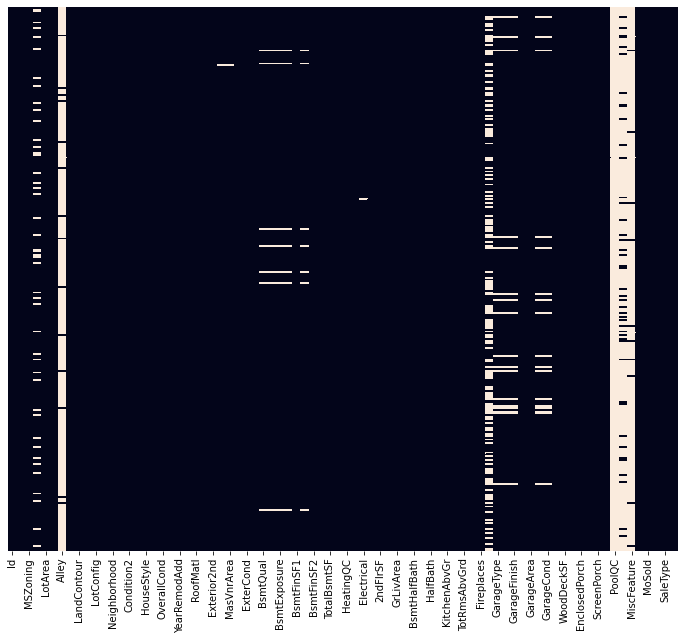

In [108]:
plt.figure(figsize=(12,10))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)
plt.show()

As we can see that there is lots of null values present in data

In [109]:
#lets Remobve Null values 

In [110]:
def Handling_Nan(dfN):
    n=df_test.columns
    for i in n:
        if dfN[i].dtype!='object':
            dfN[i].fillna(dfN[i].mean(),inplace=True)
        else:
            dfN[i].fillna(dfN[i].mode()[0],inplace=True)

In [111]:
Handling_Nan(df_test)

In [112]:
df_test.isnull().values.any()

True

Still there is Nan values presnt lets find it via ploting heatmap

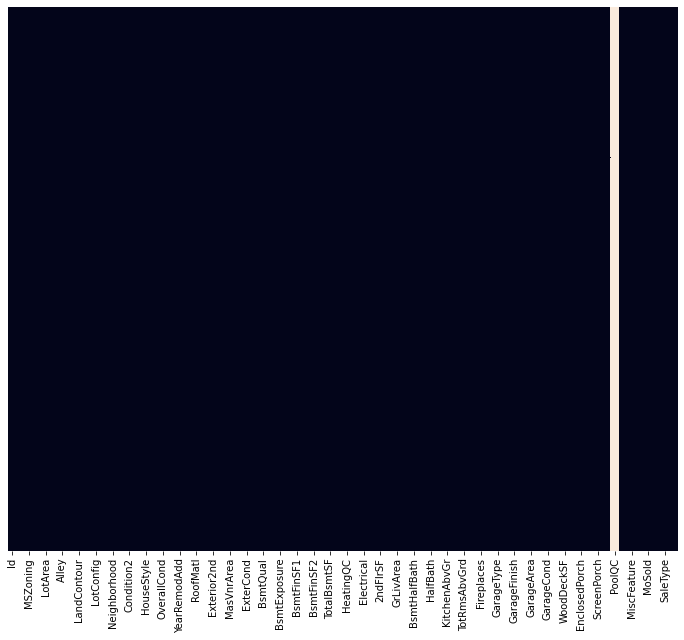

In [113]:
plt.figure(figsize=(12,10))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)
plt.show()

Here we can see that PoolQC column have null values so we removing it because it will not effect much

In [114]:
#Lets check how many null values in thAt particular column

In [115]:
df_test['PoolQC'].isnull().sum()

292

In [116]:
#we are Removing the columns PoolQC because it will not effect the house price

In [117]:
df_test.drop(columns=['PoolQC'],axis=1,inplace=True)

In [118]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL    86.000000    14157   Pave  Grvl      IR1   
1  1018         120       RL    66.425101     5814   Pave  Grvl      IR1   
2   929          20       RL    66.425101    11838   Pave  Grvl      Reg   
3  1148          70       RL    75.000000    12000   Pave  Grvl      Reg   
4  1227          60       RL    86.000000    14598   Pave  Grvl      IR1   

  LandContour Utilities  ... 3SsnPorch ScreenPorch PoolArea  Fence  \
0         HLS    AllPub  ...         0           0        0  MnPrv   
1         Lvl    AllPub  ...         0           0        0  MnPrv   
2         Lvl    AllPub  ...         0           0        0  MnPrv   
3         Bnk    AllPub  ...         0           0        0  MnPrv   
4         Lvl    AllPub  ...         0           0        0  MnPrv   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0        Shed       0      7    2007        WD         Normal  
1        Shed       0      8    2009       COD        Abnorml  
2        Shed       0      6    2009        WD         Normal  
3        Shed       0      7    2009        WD         Normal  
4        Shed       0      1    2008        WD         Normal  

[5 rows x 79 columns]

In [119]:
#lets check the null values again
df_test.isnull().values.any()

False

In [120]:
#Now there is No Null values Left in Dataset

Lets check th Correlation

In [121]:
dfcorr=df_test.corr()

In [122]:
dfcorr

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.035247    -0.016505 -0.045497     0.005823   
MSSubClass     0.035247    1.000000    -0.454786 -0.186654    -0.116077   
LotFrontage   -0.016505   -0.454786     1.000000  0.370091     0.254760   
LotArea       -0.045497   -0.186654     0.370091  1.000000     0.109161   
OverallQual    0.005823   -0.116077     0.254760  0.109161     1.000000   
OverallCond   -0.089945   -0.068113    -0.096571 -0.071113    -0.131891   
YearBuilt     -0.000174    0.041932     0.146961  0.037757     0.560092   
YearRemodAdd  -0.036955   -0.023317     0.056610 -0.022957     0.528983   
MasVnrArea    -0.012328    0.002757     0.136119  0.062943     0.423976   
BsmtFinSF1    -0.040462   -0.142908     0.152566  0.209632     0.328421   
BsmtFinSF2    -0.051283   -0.079328     0.245209  0.277855    -0.139583   
BsmtUnfSF      0.041345   -0.169129     0.161516 -0.029717     0.306051   
TotalBsmtSF   -0.019326   -0.336822     0.398795  0.283111     0.578468   
1stFlrSF       0.019726   -0.350270     0.463473  0.286714     0.553431   
2ndFlrSF       0.144675    0.338926    -0.014547  0.030128     0.205253   
LowQualFinSF   0.087688    0.012343     0.202729  0.030371     0.016101   
GrLivArea      0.139969    0.030615     0.333808  0.231721     0.565494   
BsmtFullBath  -0.077773   -0.000676     0.085464  0.212162     0.150559   
BsmtHalfBath   0.062190   -0.041577    -0.044632  0.020883    -0.076885   
FullBath       0.083174    0.095903     0.227718  0.141118     0.558577   
HalfBath       0.146049    0.213601     0.036555  0.034980     0.177858   
BedroomAbvGr   0.152676   -0.061750     0.227534  0.134990     0.108994   
KitchenAbvGr   0.007486    0.275461    -0.011201 -0.030264    -0.205815   
TotRmsAbvGrd   0.132171    0.002973     0.328972  0.211624     0.409677   
Fireplaces    -0.000541   -0.084663     0.255314  0.250416     0.425392   
GarageYrBlt   -0.001902    0.107969     0.110970  0.000671     0.548402   
GarageCars     0.053864   -0.086798     0.306181  0.154919     0.618763   
GarageArea     0.052191   -0.122536     0.317132  0.152737     0.542729   
WoodDeckSF    -0.033619    0.028190     0.006654  0.059117     0.288506   
OpenPorchSF    0.049117   -0.097449     0.075946  0.067269     0.175569   
EnclosedPorch -0.000275   -0.047570    -0.060176 -0.055667    -0.195240   
3SsnPorch     -0.134738   -0.045672     0.111523  0.007832    -0.031605   
ScreenPorch   -0.012348   -0.072139     0.068553  0.090367     0.086383   
PoolArea            NaN         NaN          NaN       NaN          NaN   
MiscVal       -0.073024    0.137542     0.031567 -0.020398    -0.099852   
MoSold         0.015132   -0.004079    -0.045333 -0.034709    -0.008545   
YrSold         0.034579    0.044441     0.059745  0.041735     0.061736   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id               -0.089945  -0.000174     -0.036955   -0.012328   -0.040462   
MSSubClass       -0.068113   0.041932     -0.023317    0.002757   -0.142908   
LotFrontage      -0.096571   0.146961      0.056610    0.136119    0.152566   
LotArea          -0.071113   0.037757     -0.022957    0.062943    0.209632   
OverallQual      -0.131891   0.560092      0.528983    0.423976    0.328421   
OverallCond       1.000000  -0.366830      0.045747   -0.082436   -0.126968   
YearBuilt        -0.366830   1.000000      0.593138    0.284245    0.343374   
YearRemodAdd      0.045747   0.593138      1.000000    0.168961    0.191460   
MasVnrArea       -0.082436   0.284245      0.168961    1.000000    0.254566   
BsmtFinSF1       -0.126968   0.343374      0.191460    0.254566    1.000000   
BsmtFinSF2        0.021459  -0.140391     -0.170299   -0.101801   -0.040759   
BsmtUnfSF        -0.095575   0.122930      0.211142    0.136378   -0.474047   
TotalBsmtSF      -0.213289   0.416016      0.336976    0.353040    0.538182   
1stFlrSF         -0.197177   0.299125      0.274479    0.369082 

In [123]:
#Checking the Correlation through visualization

<function matplotlib.pyplot.show(*args, **kw)>

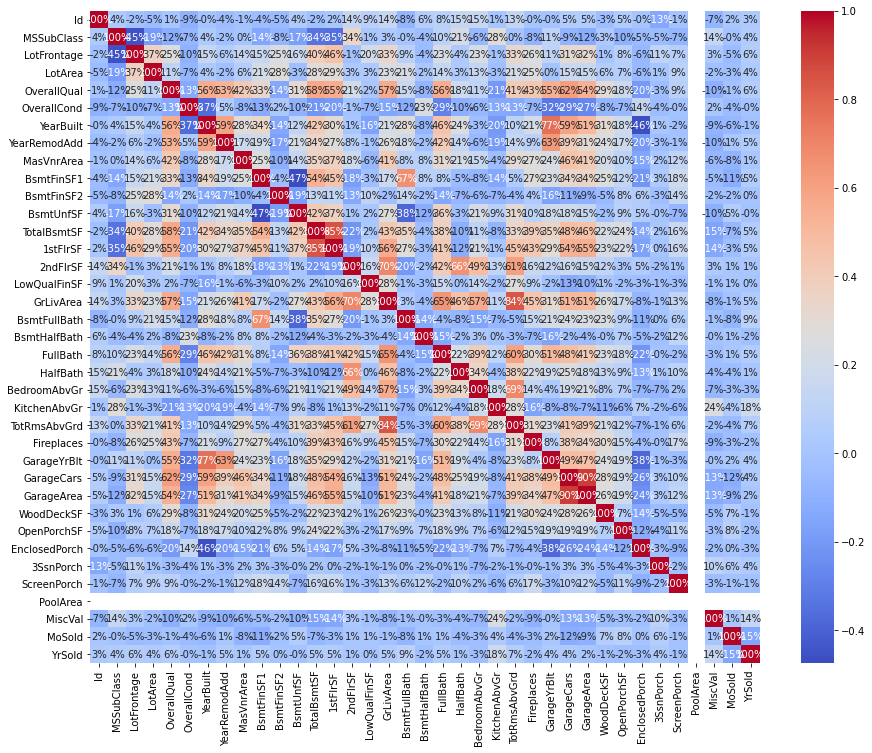

In [124]:
plt.figure(figsize=(15,12))
sns.heatmap(dfcorr,annot=True,fmt='.0%',cmap='coolwarm')
plt.show

# Exploring the Categorical Columns

In [125]:
for col in df_test.columns:
    if df_test[col].dtype==object:
        print(str(col)+ ':' + str(df_test[col].unique()))
        print("*****************************************")
        print("\n")

MSZoning:['RL' 'RM' 'FV' 'C (all)']
*****************************************


Street:['Pave' 'Grvl']
*****************************************


Alley:['Grvl' 'Pave']
*****************************************


LotShape:['IR1' 'Reg' 'IR3' 'IR2']
*****************************************


LandContour:['HLS' 'Lvl' 'Bnk' 'Low']
*****************************************


Utilities:['AllPub' 'NoSeWa']
*****************************************


LotConfig:['Corner' 'CulDSac' 'Inside' 'FR2' 'FR3']
*****************************************


LandSlope:['Gtl' 'Mod' 'Sev']
*****************************************


Neighborhood:['StoneBr' 'CollgCr' 'Crawfor' 'Somerst' 'MeadowV' 'Edwards' 'NridgHt'
 'SawyerW' 'Mitchel' 'BrkSide' 'NAmes' 'Timber' 'OldTown' 'Sawyer'
 'IDOTRR' 'SWISU' 'Gilbert' 'NWAmes' 'BrDale' 'NPkVill' 'NoRidge'
 'Blmngtn' 'Veenker' 'ClearCr']
*****************************************


Condition1:['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'PosN' 'RRAn' 'PosA']
*****************

In [126]:
#lets check the Summery Stats of the Data

In [127]:
df_test.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   292.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    19.975962   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    57.750000    7200.000000     5.000000   
50%     778.000000   50.000000    66.425101    9200.000000     6.000000   
75%    1152.250000   70.000000    76.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   292.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521  ...   
std       1.063267    30.447016     20.105792   174.729023   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

        GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count   292.000000  292.000000   292.000000     292.000000  292.000000   
mean    457.458904   86.397260    47.061644      17.708904    2.489726   
std     210.785591  121.898836    65.865449      51.892906   30.247488   
min       0.000000    0.000000     0.000000       0.000000    0.000000   
25%     300.000000    0.000000     0.000000       0.000000    0.000000   
50%     467.500000    0.000000    28.500000       0.000000    0.000000   
75%     569.750000  149.250000    66.000000       0.000000    0.000000   
max    1052.000000  728.000000   418.000000     330.000000  407.000000   

       ScreenPorch  PoolArea      MiscVal      MoSold       YrSold  
count   292.000000     292.0   292.000000  292.000000   292.000000  
mean     15.099315       0.0    28.184932    6.232877  2007.859589  
std      58.483473       0.0   224.036218    2.774556     1.322867  
min       0.000000       0.0     0.000000    1.000000  2006.000000  
25%       0.000000       0.0     0.000000    4.000000  2007.000000  
50%       0.000000       0.0     0.000000    6.000000  2008.000000  
75%       0.000000       0.0     0.000000    8.000000  2009.000000  
max     396.000000       0.0  3500.000000   12.000000  2010.000000  

[8 rows x 37 columns]

In [128]:
#here we get to know that there is high variance in data

In [129]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

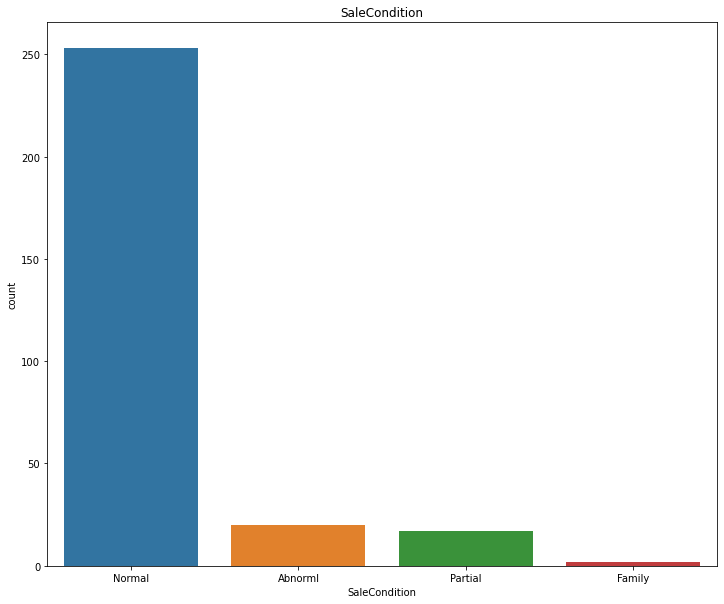

Normal     253
Abnorml     20
Partial     17
Family       2
Name: SaleCondition, dtype: int64


In [130]:
#SaleCondition

plt.figure(figsize=(12,10))
sns.countplot(x="SaleCondition",data=df_test)
plt.title("SaleCondition")
plt.show()

print(df_test.SaleCondition.value_counts())

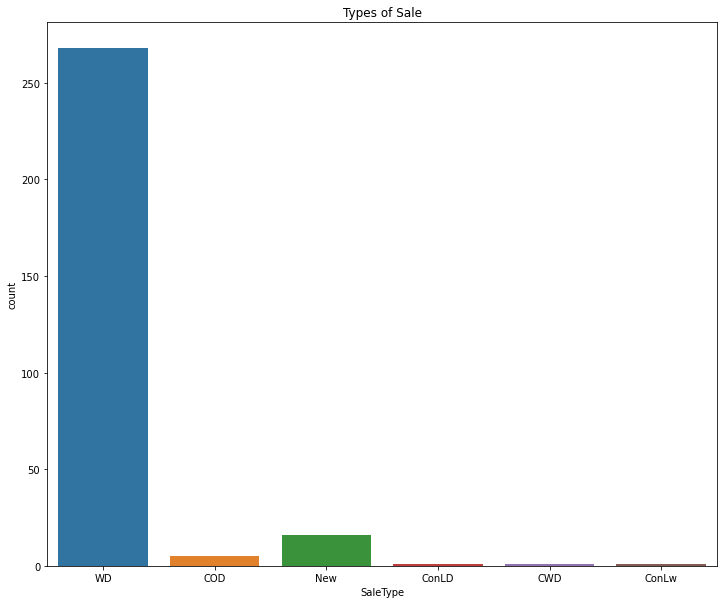

WD       268
New       16
COD        5
CWD        1
ConLD      1
ConLw      1
Name: SaleType, dtype: int64


In [131]:
#SaleType

plt.figure(figsize=(12,10))
sns.countplot(x='SaleType',data=df_test)
plt.title("Types of Sale")
plt.show()

print(df_test.SaleType.value_counts())

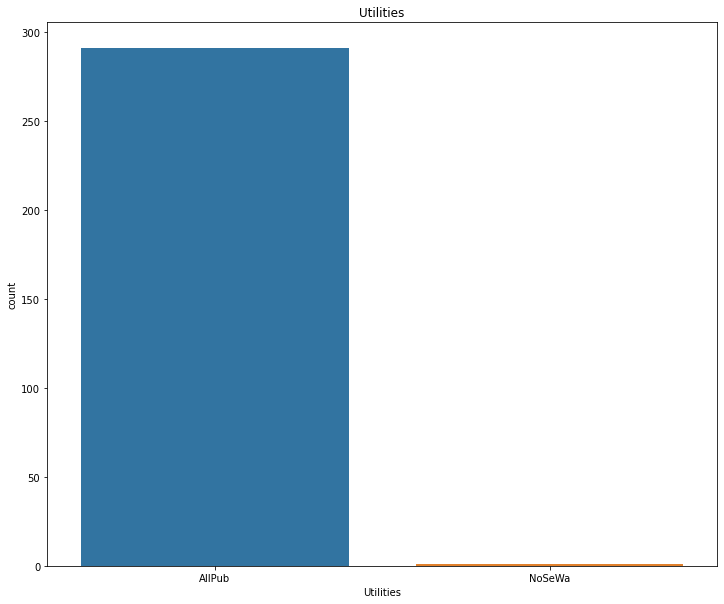

AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64


In [132]:
#Utilities

plt.figure(figsize=(12,10))
sns.countplot(x='Utilities',data=df_test)
plt.title("Utilities")
plt.show()

print(df_test.Utilities.value_counts())

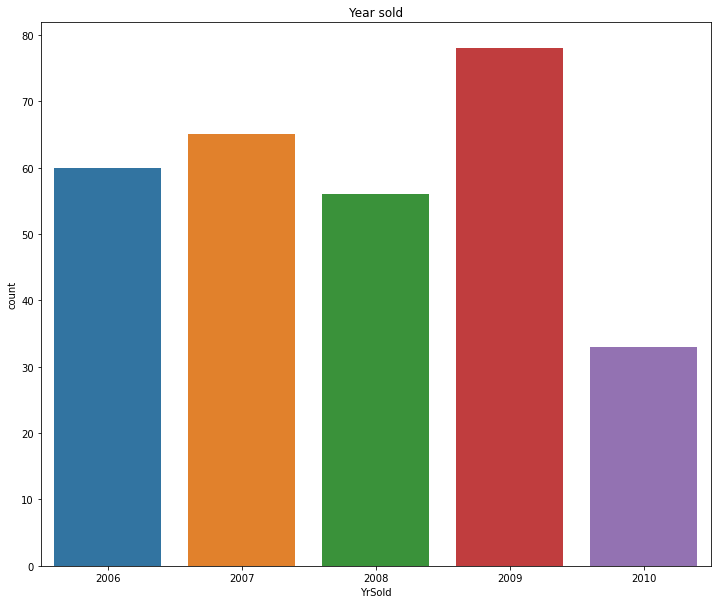

2009    78
2007    65
2006    60
2008    56
2010    33
Name: YrSold, dtype: int64


In [133]:
#YrSold

plt.figure(figsize=(12,10))
sns.countplot(x='YrSold',data=df_test)
plt.title("Year sold")
plt.show()

print(df_test.YrSold.value_counts())

# Bivariate Analysis

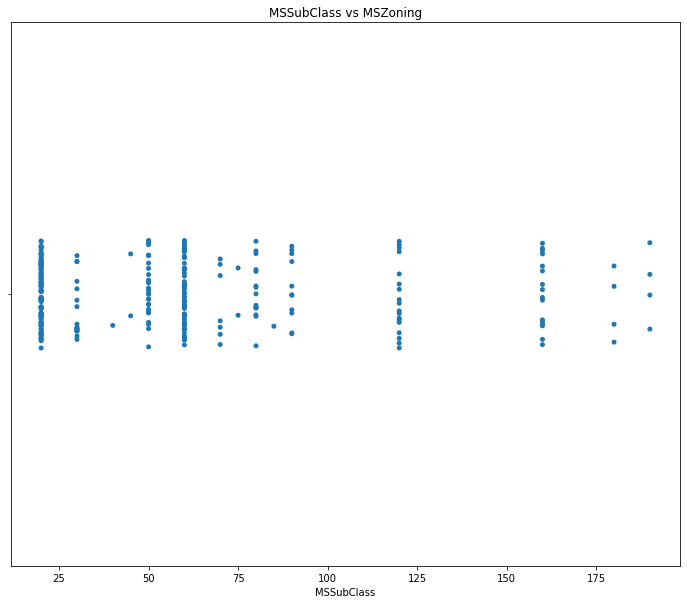

MSSubClass  MSZoning
20          RL          103
            FV            3
            RM            2
30          RM            9
            RL            8
40          RM            1
45          RL            1
            RM            1
50          RL           20
            RM           10
            C (all)       1
60          RL           51
            FV            4
70          RM            4
            RL            3
75          RL            1
            RM            1
80          RL           15
85          RL            1
90          RL            9
            RM            2
120         RM            9
            RL            8
            FV            1
160         RM            9
            FV            5
            RL            2
180         RM            4
190         RM            3
            RL            1
Name: MSZoning, dtype: int64


In [134]:
#MSSubClass vs MSZoning

plt.figure(figsize=(12,10))
sns.stripplot(x="MSSubClass",hue="MSZoning",data=df_test)
plt.title("MSSubClass vs MSZoning")
plt.show()

print(df_test.groupby('MSSubClass')['MSZoning'].value_counts())

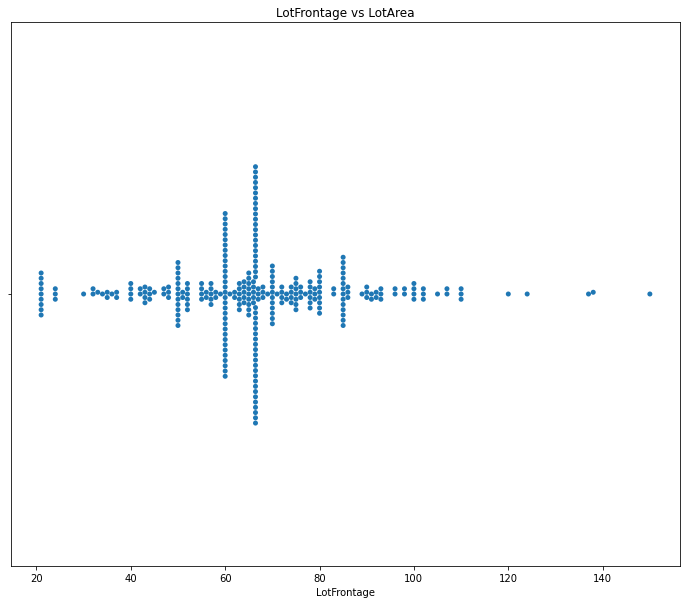

LotFrontage  LotArea
21.0         1680       4
             1526       1
             1596       1
             1936       1
             1953       1
                       ..
120.0        9560       1
124.0        16158      1
137.0        16492      1
138.0        18030      1
150.0        215245     1
Name: LotArea, Length: 265, dtype: int64


In [135]:
# LotFrontage vs LotArea

plt.figure(figsize=(12,10))
sns.swarmplot(x='LotFrontage',hue='LotArea',data=df_test)
plt.title("LotFrontage vs LotArea")
plt.show()

print(df_test.groupby('LotFrontage')['LotArea'].value_counts())

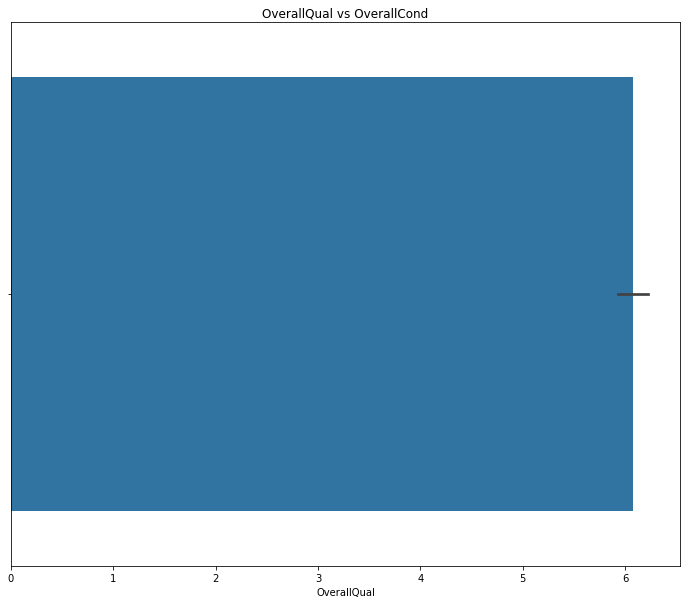

OverallQual  OverallCond
3            3               2
             4               2
4            5               7
             6               7
             4               5
             7               2
             8               1
             9               1
5            5              40
             6              14
             7              14
             8               7
             4               6
             9               2
6            5              44
             6              18
             7              13
             8               2
             3               1
             4               1
7            5              47
             6               4
             7               4
             9               2
             3               1
             8               1
8            5              29
             9               1
9            5              11
10           5               3
Name: OverallCond, dtype: int64


In [136]:
# OverallQual vs OverallCond

plt.figure(figsize=(12,10))
sns.barplot(x='OverallQual',hue='OverallCond',data=df_test)
plt.title("OverallQual vs OverallCond")
plt.show()

print(df_test.groupby('OverallQual')['OverallCond'].value_counts())

<Figure size 864x720 with 0 Axes>

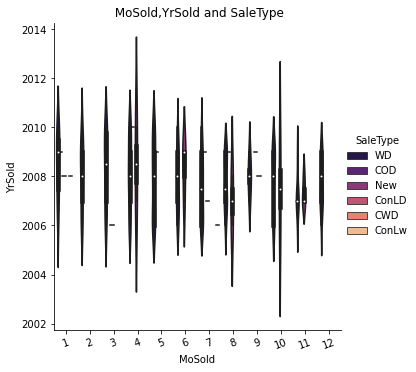

In [137]:
# MoSold,YrSold and SaleType

plt.figure(figsize=(12,10))
sns.factorplot(x='MoSold',y='YrSold',hue='SaleType',data=df_test,kind='violin',palette='magma')
plt.title(" MoSold,YrSold and SaleType")
plt.xticks(rotation=20)
plt.ylabel("YrSold")
plt.show()

# Checking Skewness

In [138]:
df_test.skew()

Id               -0.108806
MSSubClass        1.358597
LotFrontage       0.466813
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.976804
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageYrBlt      -0.683042
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
d

In [139]:
#lets check the skewness via visualization

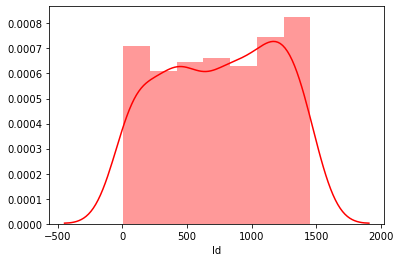

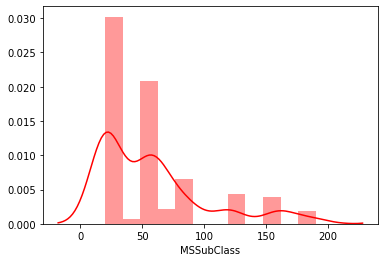

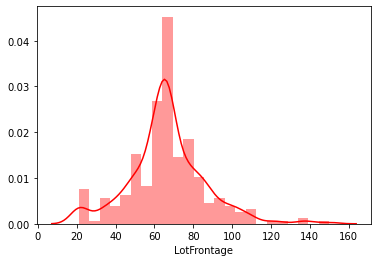

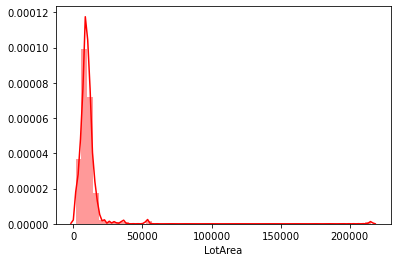

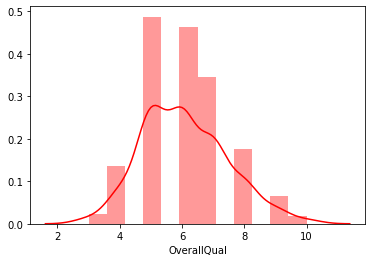

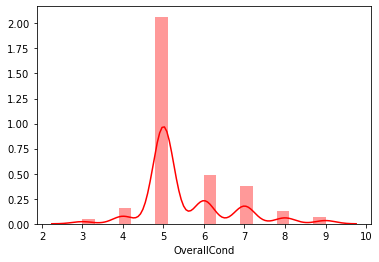

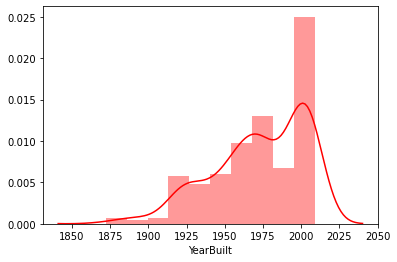

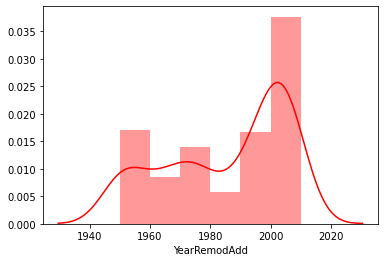

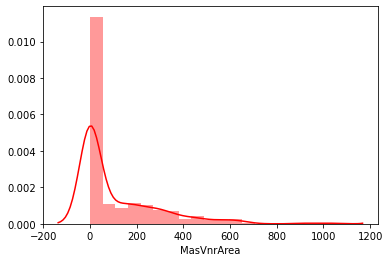

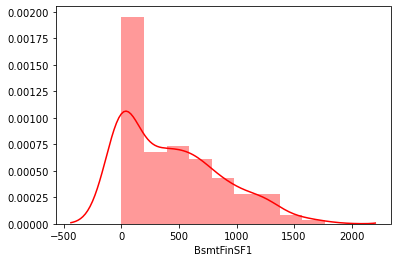

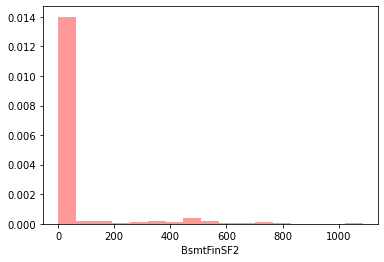

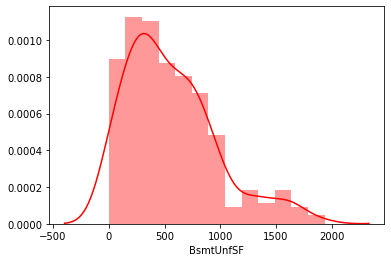

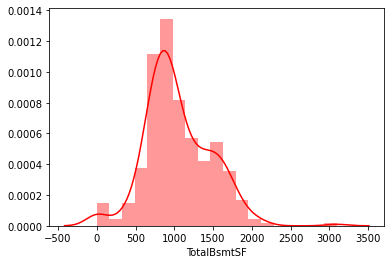

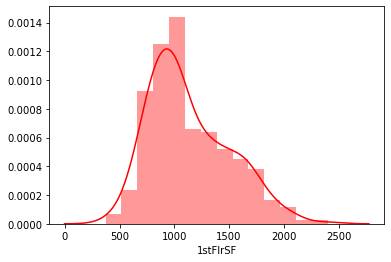

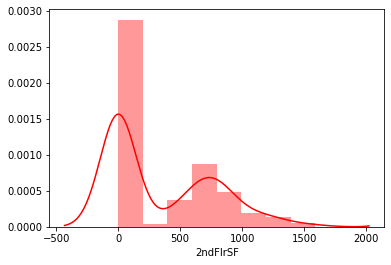

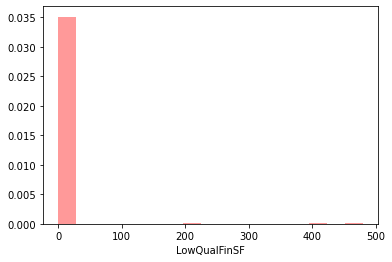

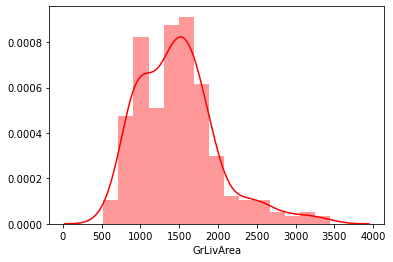

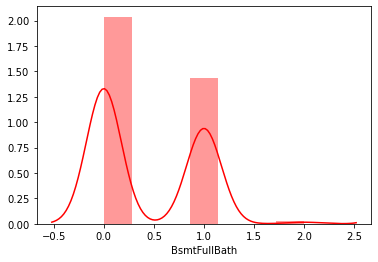

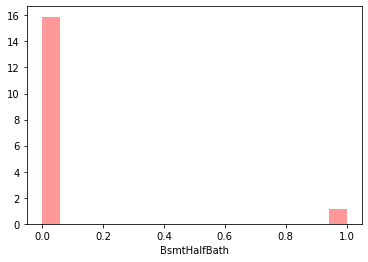

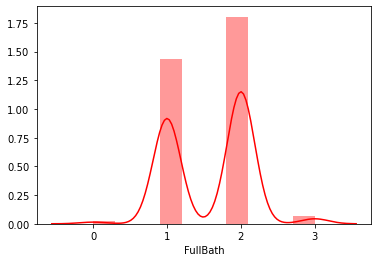

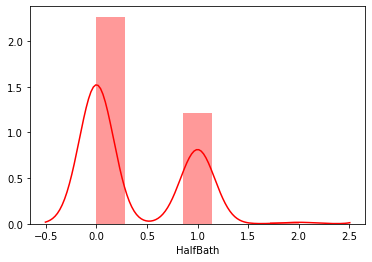

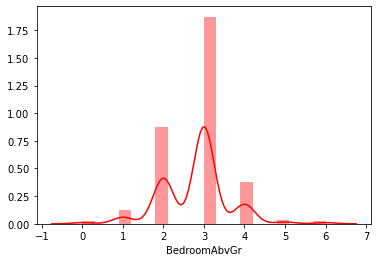

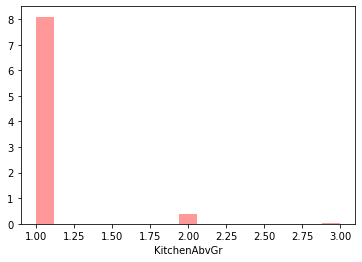

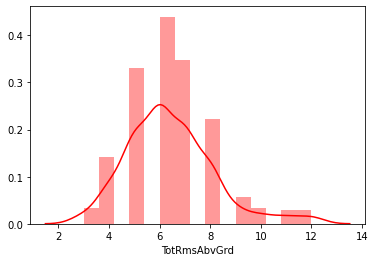

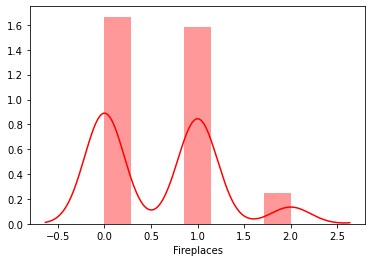

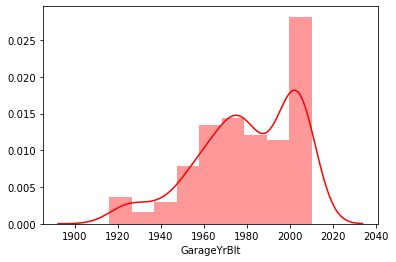

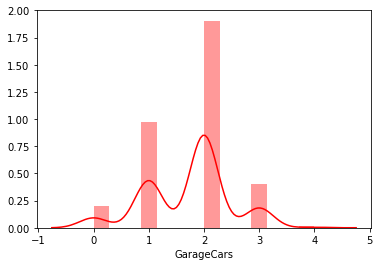

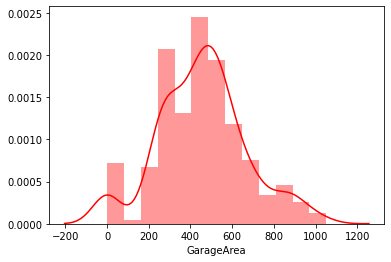

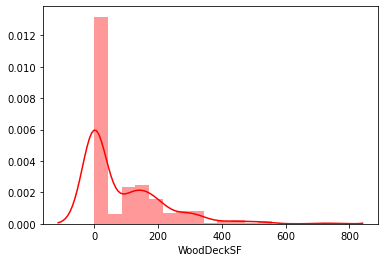

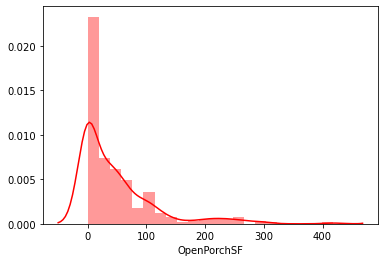

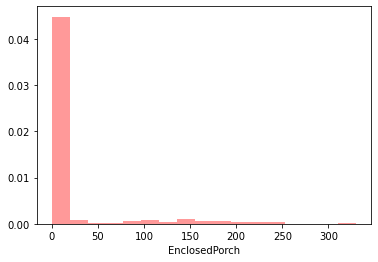

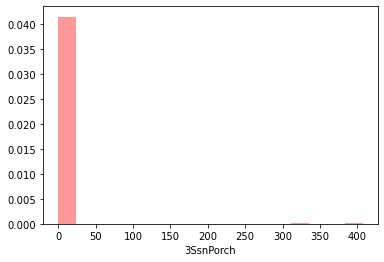

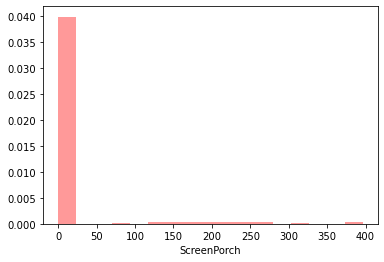

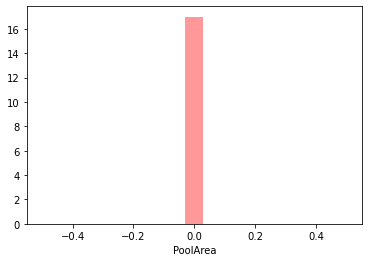

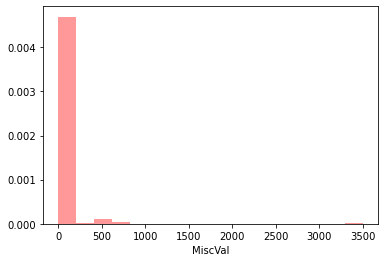

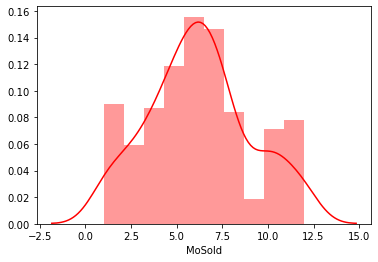

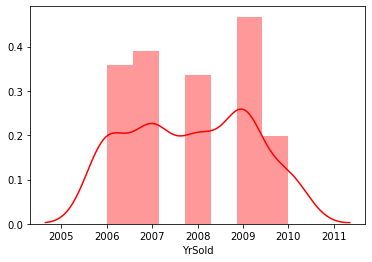

In [140]:
for column in df_test.describe().columns:
    sns.distplot(df_test[column],color='r')
    plt.show()

In [141]:
#Treating the skewness via sqaure root method

In [142]:
for column in df_test.skew().index:
    if column in df_test.describe().columns:
        if df_test[column].skew()>0.55:
            df_test[column]=np.sqrt(df_test[column])
        if df_test[column].skew()<0.55:
            df_test[column]=np.cbrt(df_test[column])

In [143]:
df_test.skew()

Id               -0.934525
MSSubClass        0.783807
LotFrontage      -0.609737
LotArea           5.201616
OverallQual      -0.008507
OverallCond       0.870844
YearBuilt        -0.775310
YearRemodAdd     -0.540961
MasVnrArea        0.876657
BsmtFinSF1       -0.671518
BsmtFinSF2        2.921229
BsmtUnfSF        -2.433771
TotalBsmtSF      -2.819137
1stFlrSF          0.117151
2ndFlrSF          0.294605
LowQualFinSF     10.160087
GrLivArea         0.139106
BsmtFullBath      0.341624
BsmtHalfBath      3.544994
FullBath         -2.279090
HalfBath          0.639215
BedroomAbvGr     -3.448281
KitchenAbvGr      4.600425
TotRmsAbvGrd      0.040046
Fireplaces       -0.044668
GarageYrBlt      -0.698032
GarageCars       -2.584316
GarageArea       -2.489205
WoodDeckSF        0.605172
OpenPorchSF       0.581144
EnclosedPorch     2.519359
3SsnPorch        12.086345
ScreenPorch       3.556260
PoolArea          0.000000
MiscVal           7.099036
MoSold           -0.717799
YrSold            0.017899
d

In [144]:
#Converting the categorical columns into Numerical columns

In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    float64
 1   MSSubClass     292 non-null    float64
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    float64
 5   Street         292 non-null    object 
 6   Alley          292 non-null    object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    float64
 18  OverallCon

In [146]:
#importing label encoder for converting the categorical columns to numarical

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
le=LabelEncoder()
for column in df_test.columns:
    if df_test[column].dtype==np.number:
        continue
    df_test[column]=le.fit_transform(df_test[column])

In [149]:
#lets check the columns

In [150]:
df_test.head()

Id  MSSubClass  MSZoning  LotFrontage     LotArea  Street  Alley  \
0   6.958943    4.472136         2     4.414005  118.983192       1      0   
1  10.059644   10.954451         2     4.049898   76.249590       1      0   
2   9.757500    4.472136         2     4.049898  108.802573       1      0   
3  10.470818    8.366600         2     4.217163  109.544512       1      0   
4  10.705695    7.745967         2     4.414005  120.822183       1      0   

   LotShape  LandContour  Utilities  ...  3SsnPorch  ScreenPorch  PoolArea  \
0         0            1          0  ...        0.0          0.0       0.0   
1         0            3          0  ...        0.0          0.0       0.0   
2         3            3          0  ...        0.0          0.0       0.0   
3         3            0          0  ...        0.0          0.0       0.0   
4         0            3          0  ...        0.0          0.0       0.0   

   Fence  MiscFeature  MiscVal    MoSold     YrSold  SaleType  SaleCondition  
0      2            1      0.0  1.912931  12.613892         5              2  
1      2            1      0.0  2.000000  12.618081         0              0  
2      2            1      0.0  1.817121  12.618081         5              2  
3      2            1      0.0  1.912931  12.618081         5              2  
4      2            1      0.0  1.000000  12.615987         5              2  

[5 rows x 79 columns]

# Checking the Outliers

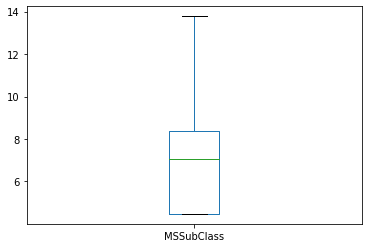

In [151]:
df_train['MSSubClass'].plot.box()

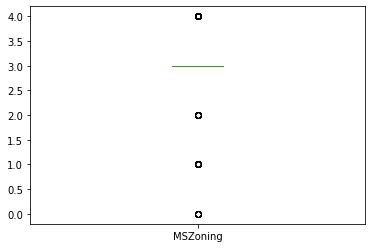

In [152]:
df_train['MSZoning'].plot.box()

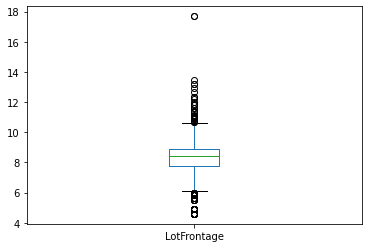

In [153]:
df_train['LotFrontage'].plot.box()

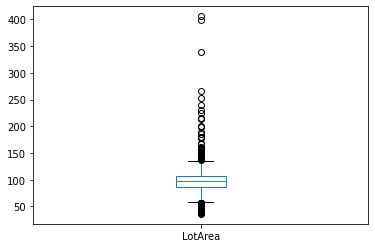

In [154]:
df_train['LotArea'].plot.box()

In [155]:
#Treating outliers using IQR 

In [156]:
def Outliers_Re(df_test):
    Q1=df_test.quantile(0.010)
    Q3=df_test.quantile(0.99)
    IQR=Q3-Q1
    df_new=df_test[~((df_test<(Q1-1.5*IQR))|(df_test>(Q3+1.5*IQR))).any(axis=1)]
    print(df_test.shape,df_test.shape)

In [157]:
Outliers_Re(df_test)

(292, 79) (292, 79)


In [158]:
import joblib

In [159]:
#lets call the model and predict it

In [160]:
model=joblib.load("House_price_ls.csv")

In [168]:
model=ls.predict(x_test)

In [169]:
model

array([370.27410078, 352.24159731, 356.12047791, 482.5626054 ,
       441.39285879, 321.4570059 , 573.46037582, 360.70902687,
       365.76796323, 445.97122519, 285.07399806, 363.5186955 ,
       409.35986763, 496.84551735, 351.13333233, 450.1809353 ,
       367.2123564 , 384.73858075, 366.20873437, 406.18844024,
       526.55737657, 438.16688803, 432.213168  , 358.01772953,
       517.76640871, 353.05775166, 368.58446786, 470.47579186,
       474.53596957, 389.52478703, 487.22723529, 504.3522729 ,
       296.98731028, 425.48959553, 585.02717837, 493.20936165,
       537.02304627, 406.89436783, 466.19363757, 430.61871842,
       363.90715519, 469.97456893, 436.83015696, 481.16134485,
       546.33621809, 433.86677227, 457.49495202, 501.43872952,
       558.39768246, 351.14790646, 571.10146978, 394.45493261,
       523.11323304, 386.12013061, 385.6057299 , 314.90749257,
       333.92717549, 355.93684625, 538.56436618, 590.62257963,
       509.97164133, 331.82039553, 363.34892313, 432.65